# Draw 3D plot of Image (pixel value)

## Download sample images

In [2]:
# gray image sample
!gdown https://drive.google.com/uc?id=1icaenRL0tFjuQFIY9CYkEHwU08F-HCoK

# color image sample
!gdown https://drive.google.com/uc?id=12ru2SWq_h7LAdptfhEeZKNPmzjeDlKzi

Downloading...
From: https://drive.google.com/uc?id=1icaenRL0tFjuQFIY9CYkEHwU08F-HCoK
To: /content/gray_sample.png
100% 51.9k/51.9k [00:00<00:00, 101MB/s]
Downloading...
From: https://drive.google.com/uc?id=12ru2SWq_h7LAdptfhEeZKNPmzjeDlKzi
To: /content/rgb_sample.png
100% 139k/139k [00:00<00:00, 74.3MB/s]


In [4]:
import cv2
import matplotlib.pyplot as plt

In [5]:
# read gray_image
gray_image = cv2.imread('/content/gray_sample.png', 0)

# read rgb_image and change colorspace
rgb_image = cv2.imread('/content/rgb_sample.png')
rgb_image = cv2.cvtColor(rgb_image, cv2.COLOR_BGR2RGB)

print(f'gray image shape: {gray_image.shape}')
print(f' rgb image shape: {rgb_image.shape}')

gray image shape: (256, 256)
 rgb image shape: (256, 256, 3)


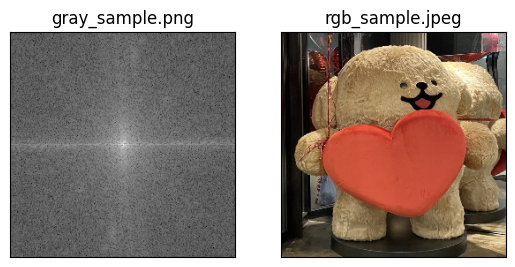

In [6]:
# visualize samples
plt.subplot(121)
plt.imshow(gray_image, cmap='gray')
plt.title('gray_sample.png')
plt.xticks([]), plt.yticks([])

plt.subplot(122)
plt.imshow(rgb_image)
plt.title('rgb_sample.jpeg')
plt.xticks([]), plt.yticks([])

plt.show()

## Draw 3D plot with gray image

In [7]:
# 3-axis coords setting
img = gray_image

width, height = img.shape[1], img.shape[0]
num_pixels = width * height

# X: width, Y: height
X = [i // height for i in range(num_pixels)]
Y = [i % height for i in range(num_pixels)]

# Z: flatten pixel value from image
Z = img.flatten()

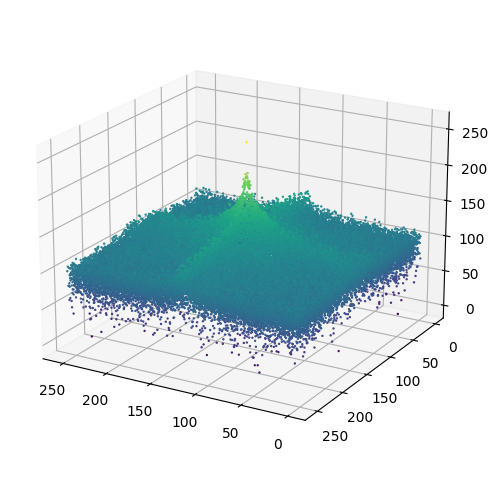

In [23]:
# draw 3d plot

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X,Y,Z, c=Z, cmap='viridis', s=0.5, alpha=1)

ax.view_init(elev=20, azim=120)  # set angle for view

plt.show()

## Draw 3D plot with rgb image

In [63]:
# 3-axis coords setting
img = rgb_image

width, height = img.shape[0], img.shape[1]
num_pixels = width * height

# X: width, Y: height
X = [i // height for i in range(num_pixels)]
Y = [i % height for i in range(num_pixels)]

# Z : [Red, Green, Blue]
Z = [each_color.flatten() for each_color in cv2.split(img)]

# set info for each plots
info = ['Reds', 'Greens', 'Blues']

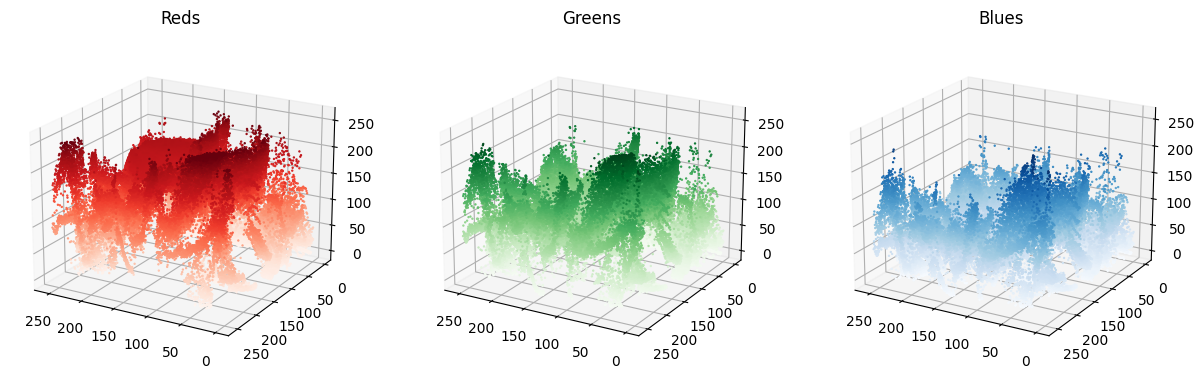

In [64]:
# draw channel-wise 3d plot

fig = plt.figure(figsize=(15,6))

for idx in range(3):
  ax = fig.add_subplot(1, 3, idx+1, projection='3d')

  ax.scatter(X,Y,Z[idx], c=Z[idx], cmap=info[idx], s=0.5, alpha=1)

  ax.set_title(info[idx])
  ax.view_init(elev=20, azim=120)  # set angle for view

plt.show()